In [10]:
import xarray as xr
import numpy as np
import scipy.integrate
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [44]:
plt.rcParams['text.usetex'] = False

In [6]:
import xarray as xr

# Path to the NetCDF file
file_path = '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/01/atmos_4xdaily.nc'

# Load the NetCDF file with decode_times set to False
dataset = xr.open_dataset(file_path, decode_times=False)


dataset

<xarray.Dataset>
Dimensions:  (phalf: 41, time: 1440, lon: 128, lonb: 129, lat: 64, latb: 65,
              pfull: 40)
Coordinates:
  * phalf    (phalf) float32 0.0 0.4844 0.6312 0.8205 ... 863.5 941.4 1e+03
  * time     (time) float64 0.25 0.5 0.75 1.0 1.25 ... 359.2 359.5 359.8 360.0
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lonb     (lonb) float32 -1.406 1.406 4.219 7.031 ... 350.2 353.0 355.8 358.6
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * latb     (latb) float32 -90.0 -86.58 -83.76 -80.96 ... 83.76 86.58 90.0
  * pfull    (pfull) float32 0.1782 0.5562 0.7238 0.9395 ... 821.4 902.2 970.5
Data variables:
    bk       (phalf) float32 ...
    pk       (phalf) float32 ...
    ps       (time, lat, lon) float32 ...
    ucomp    (time, pfull, lat, lon) float32 ...
    vcomp    (time, pfull, lat, lon) float32 ...
    temp     (time, pfull, lat, lon) float32 ...
    sphum    (time, pfull, lat, lon) float32 ...
    omega    (time, pfull, lat, lon) float32 ...
    precip   (time, lat, lon) float32 ...
    evap     (time, lat, lon) float32 ...
    t_surf   (time, lat, lon) float32 ...
Attributes:
    filename:  atmos_4xdaily.nc
    title:     MiMA

In [7]:
# Access the 'vcomp' variable
vcomp_data = dataset['vcomp']

# Print all values of the 'vcomp' variable
vcomp_data

<xarray.DataArray 'vcomp' (time: 1440, pfull: 40, lat: 64, lon: 128)>
[471859200 values with dtype=float32]
Coordinates:
  * time     (time) float64 0.25 0.5 0.75 1.0 1.25 ... 359.2 359.5 359.8 360.0
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * pfull    (pfull) float32 0.1782 0.5562 0.7238 0.9395 ... 821.4 902.2 970.5
Attributes:
    long_name:      meridional wind component
    units:          m/sec
    valid_range:    [-400.  400.]
    cell_methods:   time: point
    standard_name:  none

In [8]:
import xarray as xr

# Path to the NetCDF file
file_path = '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/25/atmos_4xdaily.nc'

# Load the NetCDF file with decode_times set to False
dataset = xr.open_dataset(file_path, decode_times=False)


# Access the 'vcomp' variable
dataset['evap']


<xarray.DataArray 'evap' (time: 1440, lat: 64, lon: 128)>
[11796480 values with dtype=float32]
Coordinates:
  * time     (time) float64 8.64e+03 8.64e+03 8.641e+03 ... 9e+03 9e+03 9e+03
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Attributes:
    long_name:      evaporation rate
    units:          kg/m2/s
    cell_methods:   time: point
    standard_name:  none

# General Circulation

In [9]:
tau = dataset['time'][-1].values - dataset['time'][0].values
print(tau)

359.75


$$
\Psi_p(p, \phi)=\frac{1}{\tau} \int_0^\tau \int_0^{2 \pi} \int_p^{p_{\text {suff }}} v a \cos \phi \frac{d p}{g} d \lambda d t
$$

### integration till psurf

In [103]:
ps = dataset['ps'].values
# p = dataset['ps'].values

In [104]:
ps[0,:,:].shape

(64, 128)

In [124]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [140]:
press

array([1.7819172e-01, 5.5618936e-01, 7.2381502e-01, 9.3952566e-01,
       1.2163188e+00, 1.5704522e+00, 2.0221829e+00, 2.5966508e+00,
       3.3249254e+00, 4.2452407e+00, 5.4044361e+00, 6.8596253e+00,
       8.6801081e+00, 1.0949540e+01, 1.3768358e+01, 1.7256456e+01,
       2.1556078e+01, 2.6834885e+01, 3.3289116e+01, 4.1146690e+01,
       5.0670143e+01, 6.2159088e+01, 7.5951927e+01, 9.2426453e+01,
       1.1199870e+02, 1.3511961e+02, 1.6226846e+02, 1.9394237e+02,
       2.3064043e+02, 2.7284131e+02, 3.2097235e+02, 3.7536783e+02,
       4.3621396e+02, 5.0347543e+02, 5.7679742e+02, 6.5536963e+02,
       7.3772467e+02, 8.2139655e+02, 9.0216870e+02, 9.7054980e+02],
      dtype=float32)

In [152]:
press_HD = np.tile(press, (1440,64,128,1))
press_HD.shape

(1440, 64, 128, 40)

In [158]:
subtract_3d_from_4d_axis3(press_HD[:,:,:,:],ps[:,:,:])

AttributeError: module 'numpy' has no attribute 'can_broadcast'

In [157]:
def subtract_3d_from_4d_axis3(array_4d, array_3d):
  """Subtracts a 3D NumPy array from a 4D NumPy array element-wise along axis=3.

  Args:
    array_4d: A 4D NumPy array.
    array_3d: A 3D NumPy array with a shape compatible for broadcasting along axis=3.

  Returns:
    A 4D NumPy array with the same shape as the input 4D array, 
    where the subtraction is performed element-wise along axis=3.

  Raises:
    ValueError: If the shapes of the arrays are not compatible for broadcasting 
                along axis=3.
  """

  if not np.can_broadcast(array_4d.shape[:-1], array_3d.shape):
    raise ValueError("Shapes of arrays are not compatible for broadcasting along axis=3.")

  return np.subtract(array_4d, np.expand_dims(array_3d, axis=-1))

In [192]:
vcomp.shape

(1440, 40, 64, 128)

In [121]:
ps[0,20,0]/100

1006.7353125

In [185]:
find_nearest(press, ps[340,0,30]/100)

35

In [122]:
press - ps[0,0,0]/100

array([-730.7164  , -730.3383  , -730.1707  , -729.955   , -729.6782  ,
       -729.3241  , -728.8724  , -728.29785 , -727.5696  , -726.6493  ,
       -725.4901  , -724.0349  , -722.2144  , -719.945   , -717.12616 ,
       -713.63806 , -709.33844 , -704.05963 , -697.6054  , -689.74786 ,
       -680.22437 , -668.7355  , -654.9426  , -638.4681  , -618.8958  ,
       -595.7749  , -568.6261  , -536.95215 , -500.2541  , -458.05322 ,
       -409.92218 , -355.5267  , -294.68057 , -227.4191  , -154.0971  ,
        -75.5249  ,    6.830139,   90.502014,  171.27417 ,  239.65527 ],
      dtype=float32)

In [179]:
ps_f = ps.flatten()
# 

In [180]:
ps_f = np.array([find_nearest(press, pi/100) for pi in ps_f])

In [181]:
ps_f = ps_f.reshape(ps.shape)

In [186]:
ps_f[340,0,30]

35

In [194]:
c = 0
for i in range(1440):
    for j in range(64):
        for k in range(128):
            final_p = ps_f[i,j,k]
            # print(final_p)
            scipy.integrate.simps(vcomp[i, c:final_p, j, k], press[c:final_p])

    print(i,j,k)
    

0 63 127
1 63 127
2 63 127
3 63 127
4 63 127
5 63 127
6 63 127
7 63 127
8 63 127
9 63 127
10 63 127
11 63 127
12 63 127
13 63 127
14 63 127
15 63 127
16 63 127
17 63 127
18 63 127
19 63 127
20 63 127
21 63 127
22 63 127
23 63 127
24 63 127
25 63 127
26 63 127
27 63 127
28 63 127
29 63 127
30 63 127
31 63 127
32 63 127
33 63 127
34 63 127
35 63 127
36 63 127
37 63 127
38 63 127
39 63 127
40 63 127
41 63 127
42 63 127
43 63 127
44 63 127
45 63 127
46 63 127
47 63 127
48 63 127
49 63 127
50 63 127
51 63 127
52 63 127


KeyboardInterrupt: 

In [ ]:
scipy.integrate.simps(vcomp[:, i:, :, :], press[i:], axis=1)

Calculating Streamfunction: 100%|██████████| 40/40 [01:20<00:00,  2.02s/it]


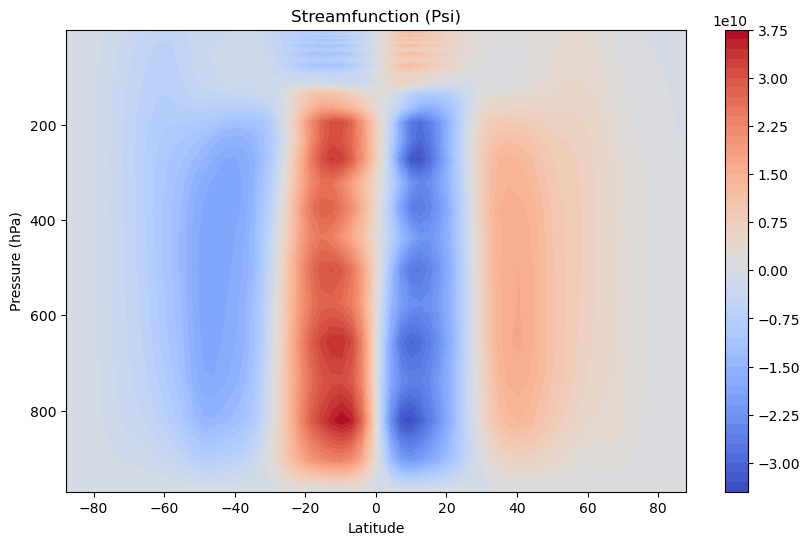

In [188]:
import xarray as xr
import numpy as np
import scipy.integrate
from tqdm import tqdm 
import matplotlib.pyplot as plt

a = 6371000  # Earth's radius in meters
g = 9.81     # Acceleration due to gravity in m/s^2

# Path to the NetCDF file
file_path = '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/25/atmos_4xdaily.nc'

# Load the NetCDF file with decode_times set to False
dataset = xr.open_dataset(file_path, decode_times=False)

# Access the 'vcomp' variable
vcomp = dataset['vcomp']

# Coordinates
press = dataset['pfull'].values  # Pressure levels
lat = dataset['lat'].values      # Latitude
lon = dataset['lon'].values      # Longitude
time = dataset['time'].values    # Time points
tau = dataset['time'][-1].values - dataset['time'][0].values

# Initialize the streamfunction array
psi = np.zeros((len(press), len(lat)))

# Calculate the streamfunction
for i in tqdm(range(len(press)), desc='Calculating Streamfunction'):
    p = press[i]
    # Integrate over the vertical, longitude, and time dimensions
    temp = scipy.integrate.simps(vcomp[:, i:, :, :], press[i:], axis=1)
    temp_u = scipy.integrate.simps(temp, lon, axis=2)
    temp_u_u = scipy.integrate.simps(temp_u, time, axis=0)
    temp_u_u_u = temp_u_u * np.cos(np.deg2rad(lat))
    psi[i, :] = temp_u_u_u * a / g 

# Plotting
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(lat, press)
cp = plt.contourf(X, Y, psi* a / g / tau, levels=50, cmap='coolwarm')
plt.colorbar(cp)
plt.title('Streamfunction (Psi)')
plt.xlabel('Latitude')
plt.ylabel('Pressure (hPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show pressure decreasing with height
plt.show()


Calculating Streamfunction: 100%|██████████| 40/40 [07:40<00:00, 11.51s/it]


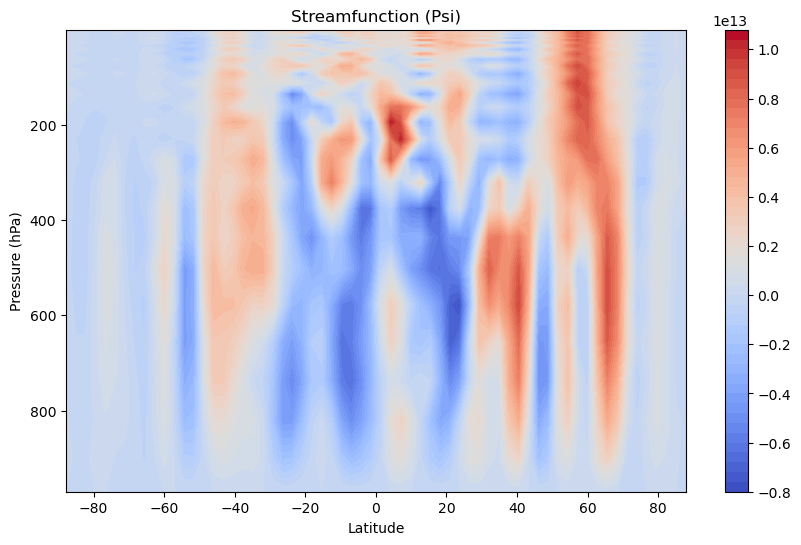

In [7]:
import xarray as xr
import numpy as np
import scipy.integrate
from tqdm import tqdm 
import matplotlib.pyplot as plt

a = 6371000  # Earth's radius in meters
g = 9.81     # Acceleration due to gravity in m/s^2

# Paths to the NetCDF files
file_paths = [
    '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/25/atmos_4xdaily.nc',
    '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/24/atmos_4xdaily.nc',
    '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/23/atmos_4xdaily.nc',
    '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/22/atmos_4xdaily.nc',
    '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/21/atmos_4xdaily.nc'
]

# Load the datasets, assuming they are large, use chunks
datasets = [xr.open_dataset(path, chunks={'time': 7200}, decode_times=False) for path in file_paths]

# Concatenate the datasets along the 'time' dimension
dataset = xr.concat(datasets, dim='time')

# # Path for the merged file
# merged_file_path = '/scratch/negishi/yan481/3004/merged21-25_doubleCO2_atmos_4xdaily.nc'
# dataset.to_netcdf(merged_file_path)


# Access the 'vcomp' variable
vcomp = dataset['vcomp']

# Coordinates
press = dataset['pfull'].values  # Pressure levels
lat = dataset['lat'].values      # Latitude
lon = dataset['lon'].values      # Longitude
time = dataset['time'].values    # Time points
tau = dataset['time'][-1].values - dataset['time'][0].values

# Initialize the streamfunction array
psi = np.zeros((len(press), len(lat)))

# Calculate the streamfunction
for i in tqdm(range(len(press)), desc='Calculating Streamfunction'):
    p = press[i]
    # Integrate over the vertical, longitude, and time dimensions
    temp = scipy.integrate.simps(vcomp[:, i:, :, :], press[i:], axis=1)
    temp_u = scipy.integrate.simps(temp, lon, axis=2)
    temp_u_u = scipy.integrate.simps(temp_u, time, axis=0)
    temp_u_u_u = temp_u_u * np.cos(np.deg2rad(lat))
    psi[i, :] = temp_u_u_u

# Plotting
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(lat, press)
cp = plt.contourf(X, Y, psi* a / g / tau, levels=50, cmap='coolwarm')
plt.colorbar(cp)
plt.title('Streamfunction (Psi)')
plt.xlabel('Latitude')
plt.ylabel('Pressure (hPa)')
plt.gca().invert_yaxis()  # Invert y-axis to show pressure decreasing with height
plt.show()


# Global temperature

In [95]:
time = dataset['time'].values

In [6]:
vcomp

<xarray.DataArray 'vcomp' (time: 1440, pfull: 40, lat: 64, lon: 128)>
[471859200 values with dtype=float32]
Coordinates:
  * time     (time) float64 8.64e+03 8.64e+03 8.641e+03 ... 9e+03 9e+03 9e+03
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * pfull    (pfull) float32 0.1782 0.5562 0.7238 0.9395 ... 821.4 902.2 970.5
Attributes:
    long_name:      meridional wind component
    units:          m/sec
    valid_range:    [-400.  400.]
    cell_methods:   time: point
    standard_name:  none

In [7]:
temp = dataset['t_surf']

In [8]:
temp_data = temp.values
temp_data.shape

(1440, 64, 128)

In [9]:
temp_avg_daily = np.mean(np.mean(temp_data, axis=1), axis = 1)

In [10]:
dataset['time'][3].values

array(8641.)

In [11]:
30*12*25

9000

In [12]:
time

array([8640.25, 8640.5 , 8640.75, ..., 8999.5 , 8999.75, 9000.  ])

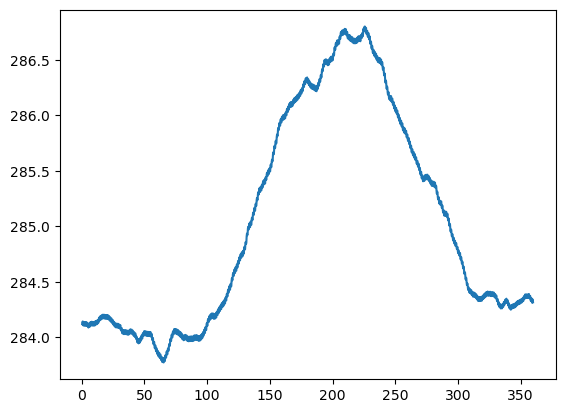

In [13]:
plt.plot(time - 30*12*24, temp_avg_daily)

## Time evolution

In [108]:
# Path to the NetCDF file
file_path_i = '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/01/atmos_4xdaily.nc'
file_path_f = '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_flatTopography_25yrs/25/atmos_4xdaily.nc'


# Load the NetCDF file with decode_times set to False
print('Loading 1st year file')
dataset = xr.open_dataset(file_path_i, decode_times=False)
temp_data = dataset['t_surf'].values
temp_avg_daily_i = np.mean(temp_data, axis=(1, 2))

print('Loading year file')
dataset = xr.open_dataset(file_path_f, decode_times=False)
temp_data = dataset['t_surf'].values
temp_avg_daily_f = np.mean(temp_data, axis=(1, 2))

print('Getting the time')
time = dataset['time'].values

Loading 1st year file
Loading 25th year file
Getting the time


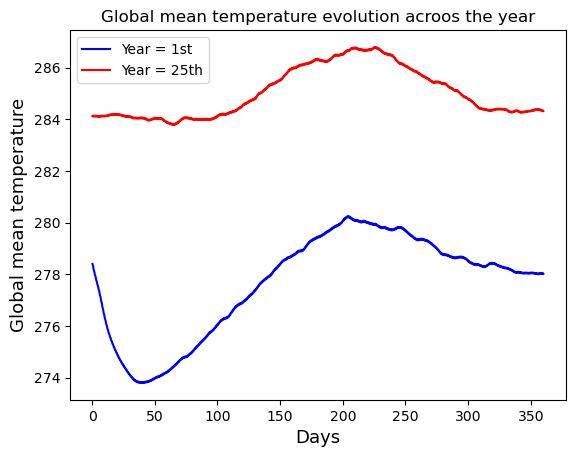

In [115]:
plt.plot(time - 30*12*24, temp_avg_daily_i, 'b', label='Year = 1st')
plt.plot(time - 30*12*24, temp_avg_daily_f, 'r', label='Year = 25th')

plt.xlabel('Days', fontsize=13)
plt.ylabel('Global mean temperature', fontsize=13)
plt.title('Global mean temperature evolution acroos the year')

plt.savefig('GlobalTemp_1yr1st.png', bbox_inches='tight', format='png', dpi=300)

plt.legend()
plt.show()

### 1 times CO2

In [12]:
temp_stats_10 = np.zeros((20,5,1440))

In [14]:
for i in range(1,14):
    number = i
    folder_path = '/scratch/ar8303/mima_co2_00/'
    str_i = "{:02d}".format(number)
    file_path = '/atmos_4xdaily.nc'
    # print(str_i)
    year_path = folder_path + str_i + file_path

    print('================================================================')
    print('Year in calculation: ', str_i)
    
    # Load the NetCDF file with decode_times set to False
    print('Loading year file')
    dataset = xr.open_dataset(year_path, decode_times=False)

    print('Getting the surface temperature')
    temp_data = dataset['t_surf'].values

    #max
    temp_stats_10[i-1,2,:] = np.max(temp_data, axis=(1, 2))
    
    #min
    temp_stats_10[i-1,3,:] = np.min(temp_data, axis=(1, 2))
    
    print('Computing daily global mean temperature')
    temp_avg_daily = np.mean(temp_data, axis=(1, 2))

    #mean
    temp_stats_10[i-1,0,:] = temp_avg_daily
    #variance
    temp_stats_10[i-1,1,:] = np.var(temp_data, axis=(1, 2))

Year in calculation:  01
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  02
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  03
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  04
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  05
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  06
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  07
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  08
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  09
Loading year file
Getting the surface temperature
Compu

### 1.5 times CO2

In [15]:
temp_stats_15 = np.zeros((20,5,1440))

In [24]:
for i in range(1,21):
    number = i
    folder_path = '/scratch/epg2-share/MiMA/output/ar8303/mima_20_CO2_15_u2/'
    str_i = "{:02d}".format(number)
    file_path = '/atmos_4xdaily.nc'
    # print(str_i)
    year_path = folder_path + str_i + file_path
    
    print('Year in calculation: ', str_i)
    
    # Load the NetCDF file with decode_times set to False
    print('Loading year file')
    dataset = xr.open_dataset(year_path, decode_times=False)

    print('Getting the surface temperature')
    temp_data = dataset['t_surf'].values

    #max
    temp_stats_15[i-1,2,:] = np.max(temp_data, axis=(1, 2))
    
    #min
    temp_stats_15[i-1,3,:] = np.min(temp_data, axis=(1, 2))
    
    print('Computing daily global mean temperature')
    temp_avg_daily = np.mean(temp_data, axis=(1, 2))

    #mean
    temp_stats_15[i-1,0,:] = temp_avg_daily
    #variance
    temp_stats_15[i-1,1,:] = np.var(temp_data, axis=(1, 2))

Year in calculation:  01
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  02
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  03
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  04
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  05
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  06
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  07
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  08
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  09
Loading year file
Getting the surface temperature
Compu

In [92]:
temp_stats_15[:,1,:].shape

(20, 1440)

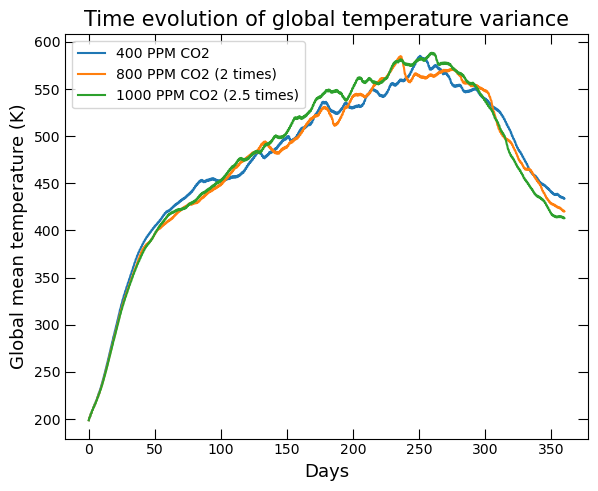

In [106]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global temperature variance", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Days', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(time-time[0], (temp_stats_15[0,1,:]), markerfacecolor='none', label='400 PPM CO2')
ax.plot(time-time[0], (temp_stats_20[0,1,:]), markerfacecolor='none', label='800 PPM CO2 (2 times)')
ax.plot(time-time[0], (temp_stats_25[0,1,:]), markerfacecolor='none', label='1000 PPM CO2 (2.5 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalTemp_Var_01yr.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

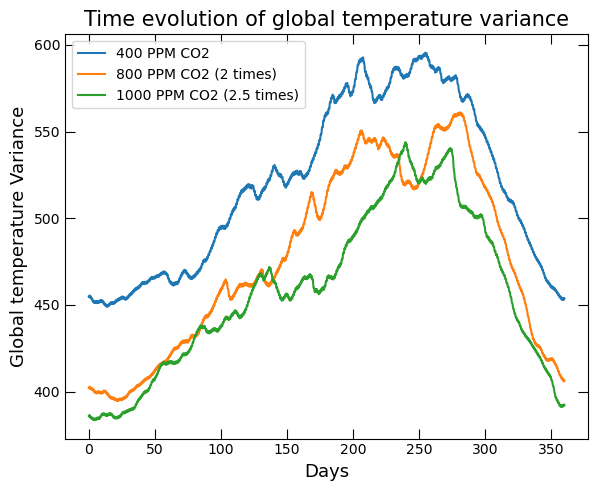

In [105]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global temperature variance", size=15)

ax.set_ylabel('Global temperature Variance', fontsize=13)
ax.set_xlabel('Days', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(time-time[0], (temp_stats_15[-1,1,:]), markerfacecolor='none', label='400 PPM CO2')
ax.plot(time-time[0], (temp_stats_20[-1,1,:]), markerfacecolor='none', label='800 PPM CO2 (2 times)')
ax.plot(time-time[0], (temp_stats_25[-1,1,:]), markerfacecolor='none', label='1000 PPM CO2 (2.5 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalTemp_Var_25yr.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [54]:
# var_sum_10 = np.sum(temp_stats_10[:14,1,:14], axis=1)
var_sum_15 = np.sum(temp_stats_15[:,1,:], axis=1)
var_sum_20 = np.sum(temp_stats_20[:,1,:], axis=1)
var_sum_25 = np.sum(temp_stats_25[:,1,:], axis=1)

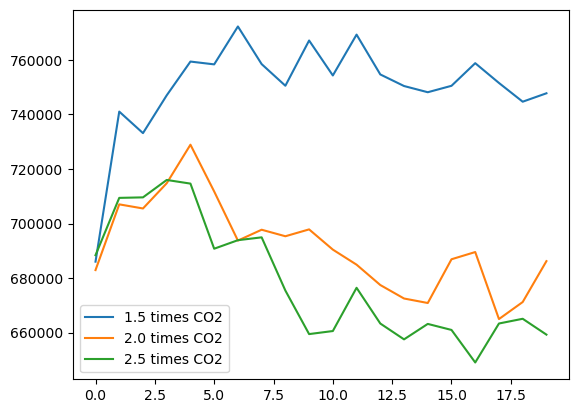

In [55]:
# plt.plot(var_sum_10, label='1.0 times CO2')
plt.plot(var_sum_15, label='1.5 times CO2')
plt.plot(var_sum_20, label='2.0 times CO2')
plt.plot(var_sum_25, label='2.5 times CO2')

plt.legend()

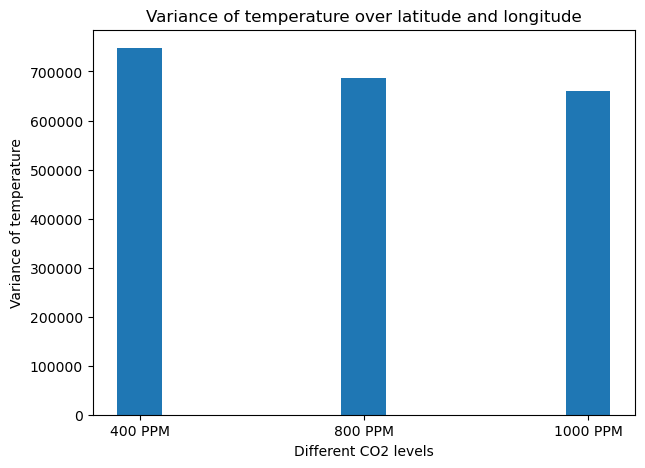

In [67]:
courses = ['400 PPM', '800 PPM', '1000 PPM']
values = np.array([var_sum_15[-1], var_sum_20[-1], var_sum_25[-1]])
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(courses, values,  
        width = 0.2)
 
plt.xlabel("Different CO2 levels")
plt.ylabel("Variance of temperature")
plt.title("Variance of temperature over latitude and longitude")
plt.show()

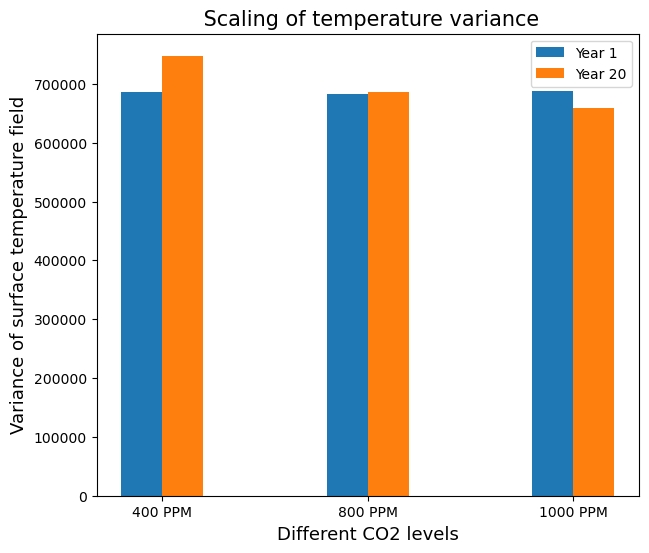

In [116]:
courses = ['400 PPM', '800 PPM', '1000 PPM']
values_f = np.array([var_sum_15[-1], var_sum_20[-1], var_sum_25[-1]])
values_i = np.array([var_sum_15[0], var_sum_20[0], var_sum_25[0]])

barWidth = 0.2

bar = np.arange(3)
bar_f = [x + 1.5*barWidth for x in bar] 
bar_i = [x + 0.5*barWidth for x in bar] 
  
fig = plt.figure(figsize = (7, 6))
 
# creating the bar plot
plt.bar(bar_i, values_i,  
        width = 0.2, label ='Year 1')
plt.bar(bar_f, values_f,  
        width = 0.2, label ='Year 20')
 
plt.xlabel("Different CO2 levels", fontsize=13)
plt.ylabel("Variance of surface temperature field", fontsize=13)
plt.xticks([r + barWidth for r in range(3)], 
        courses)
plt.legend()
plt.title(" Scaling of temperature variance", fontsize=15)
plt.savefig('GlobalTempVar_bar.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

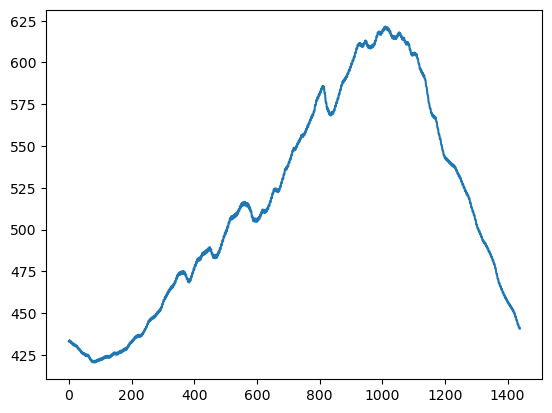

In [66]:
plt.plot(temp_stats_15[1,1,:])

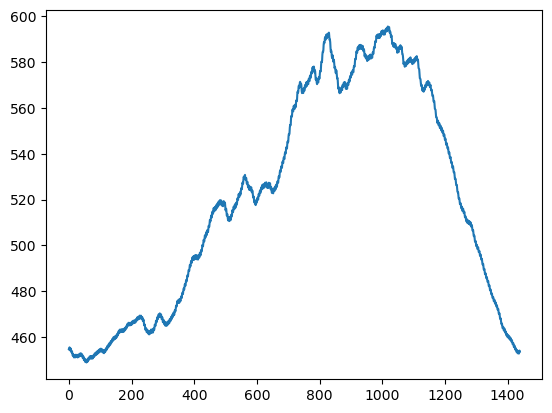

In [65]:
plt.plot(temp_stats_15[-1,1,:])

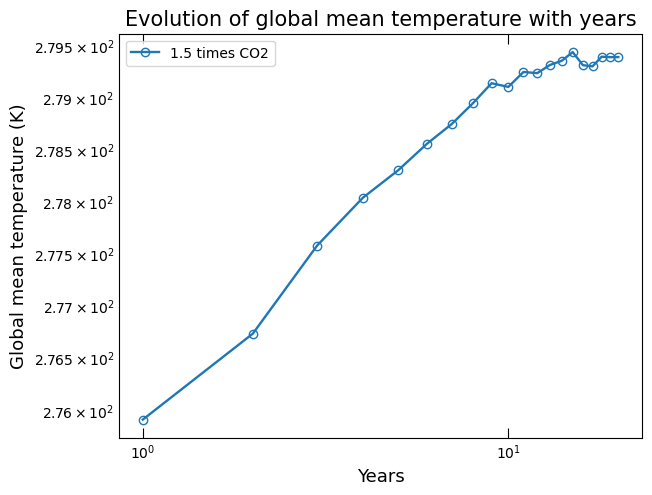

In [35]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Evolution of global mean temperature with years", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.loglog(np.arange(1,21), temp_stats_15[:,0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='1.5 times CO2')

locs, labels = plt.yticks()


ax.legend()
# plt.savefig('GlobalMeanTemp_log.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

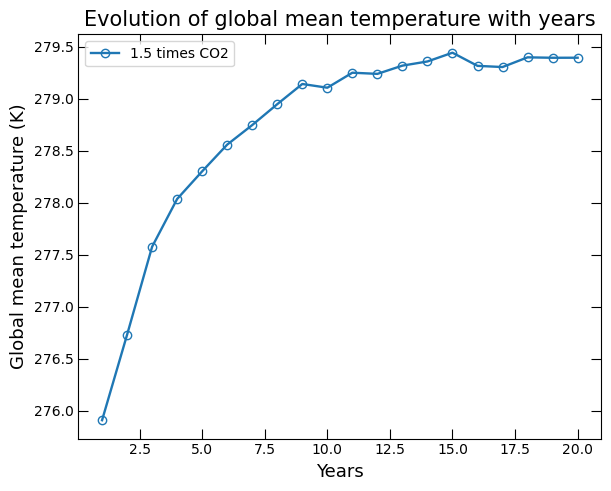

In [19]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Evolution of global mean temperature with years", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


# ax.semilogy(f_GM_1 - p_star, linewidth=1.7, markersize=3, markerfacecolor='none', label='backtracking')
ax.plot(np.arange(1,21), temp_stats_15[:,0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='1.5 times CO2')
# ax.loglog(lam_small_lam, lam_small_thres, '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='Small problem, n=100')
ax.legend()

# plt.savefig('GlobalMeanTemp.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

### 2 times CO2

In [17]:
temp_stats_20 = np.zeros((20,5,1440))

In [18]:
for i in range(1,21):
    number = i
    folder_path = '/scratch/epg2-share/MiMA/output/Ken_Akash_Shared_Output/mima_run_doubleCO2_20yrs/'
    str_i = "{:02d}".format(number)
    file_path = '/atmos_4xdaily.nc'
    # print(str_i)
    year_path = folder_path + str_i + file_path
    
    print('Year in calculation: ', str_i)
    
    # Load the NetCDF file with decode_times set to False
    print('Loading year file')
    dataset = xr.open_dataset(year_path, decode_times=False)

    print('Getting the surface temperature')
    temp_data = dataset['t_surf'].values

    #max
    temp_stats_20[i-1,2] = np.max(temp_data, axis=(1, 2))
    
    #min
    temp_stats_20[i-1,3] = np.min(temp_data, axis=(1, 2))
    
    print('Computing daily global mean temperature')
    temp_avg_daily = np.mean(temp_data, axis=(1, 2))

    #mean
    temp_stats_20[i-1,0] = (temp_avg_daily)
    #variance
    temp_stats_20[i-1,1] = np.var(temp_data, axis=(1, 2))
    
    

Year in calculation:  01
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  02
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  03
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  04
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  05
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  06
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  07
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  08
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  09
Loading year file
Getting the surface temperature
Compu

In [91]:
temp_stats_20.shape

(20, 5, 1440)

Text(0.5, 1.0, 'Evolution of global mean temperature')

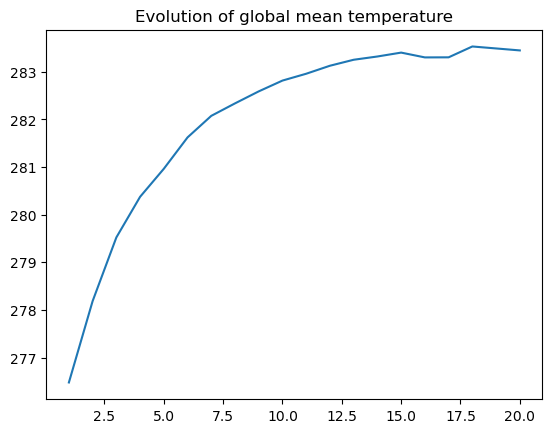

In [92]:
plt.plot(np.arange(1,21), np.mean(temp_stats_20[:,0,:], axis= 1))
plt.title('Evolution of global mean temperature')

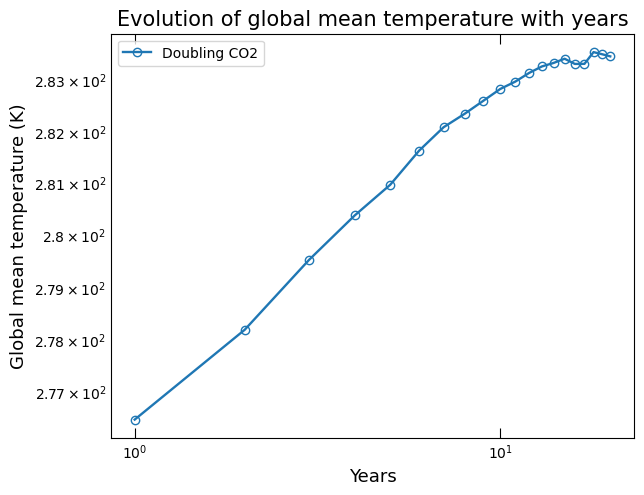

In [95]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Evolution of global mean temperature with years", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.loglog(np.arange(1,21), np.mean(temp_stats_20[:,0,:], axis= 1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='Doubling CO2')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp_2times_log.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

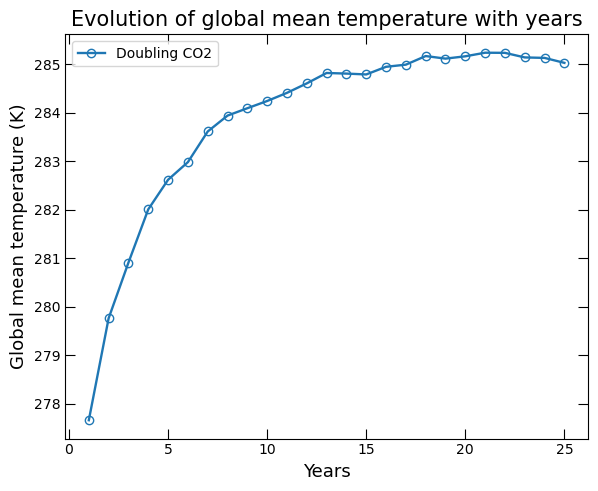

In [25]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Evolution of global mean temperature with years", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(np.arange(1,26), temp_stats_20[:,0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='Doubling CO2')
ax.legend()

# plt.savefig('GlobalMeanTemp.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [ ]:
plt.plot(np.arange(1,26), temp_stats[:,1])
plt.title('Evolution of global temperature variance')

In [ ]:
plt.plot(np.arange(1,26), temp_stats[:,2])
plt.title('Evolution of global temperature Maximum')

In [ ]:
plt.plot(np.arange(1,26), temp_stats[:,3])
plt.title('Evolution of global temperature Minimum')

### 2.5 Times CO2

In [19]:
temp_stats_25 = np.zeros((20,5,1440))

In [20]:
for i in range(1,21):
    number = i
    folder_path = '/scratch/epg2-share/MiMA/output/ar8303/mima_co2_25/'
    str_i = "{:02d}".format(number)
    file_path = '/atmos_4xdaily.nc'
    # print(str_i)
    year_path = folder_path + str_i + file_path
    
    print('Year in calculation: ', str_i)
    
    # Load the NetCDF file with decode_times set to False
    print('Loading year file')
    dataset = xr.open_dataset(year_path, decode_times=False)

    print('Getting the surface temperature')
    temp_data = dataset['t_surf'].values

    #max
    temp_stats_25[i-1,2] = np.max(temp_data, axis=(1, 2))
    
    #min
    temp_stats_25[i-1,3] = np.min(temp_data, axis=(1, 2))
    
    print('Computing daily global mean temperature')
    temp_avg_daily = np.mean(temp_data, axis=(1, 2))

    #mean
    temp_stats_25[i-1,0] = (temp_avg_daily)
    #variance
    temp_stats_25[i-1,1] = np.var(temp_data, axis=(1, 2))

Year in calculation:  01
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  02
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  03
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  04
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  05
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  06
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  07
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  08
Loading year file
Getting the surface temperature
Computing daily global mean temperature
Year in calculation:  09
Loading year file
Getting the surface temperature
Compu

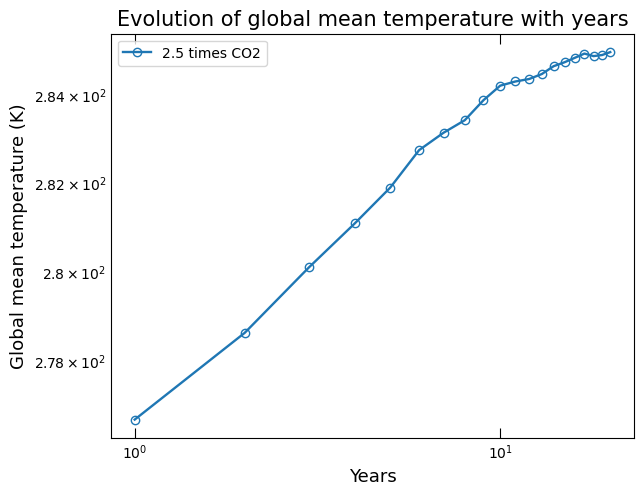

In [28]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Evolution of global mean temperature with years", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.loglog(np.arange(1,21), temp_stats_25[:,0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='2.5 times CO2')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp_2.5times_log.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

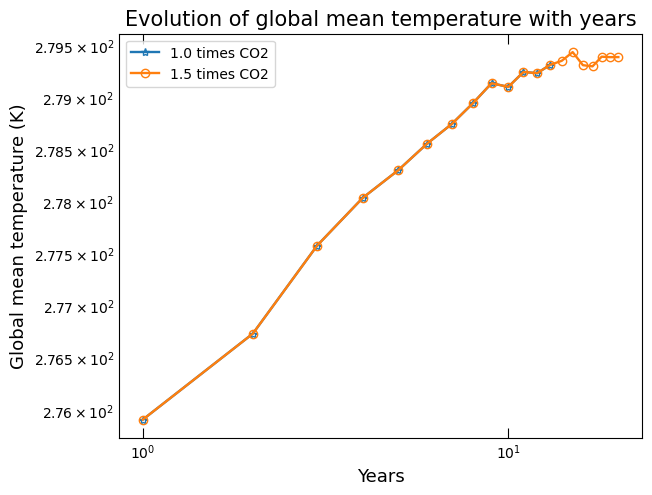

In [34]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Evolution of global mean temperature with years", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.loglog(np.arange(1,14), np.mean(temp_stats_10[:13,0,:],axis=1), '-*', linewidth=1.7, markersize=6, markerfacecolor='none', label='1.0 times CO2')
ax.loglog(np.arange(1,21), np.mean(temp_stats_15[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='1.5 times CO2')
# ax.loglog(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='2.0 times CO2')
# ax.loglog(np.arange(1,21), np.mean(temp_stats_25[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='2.5 times CO2')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp_log.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [28]:
np.mean(temp_stats_10[:13,0,:],axis=1)

array([275.91112058, 276.73283702, 277.5781574 , 278.03703259,
       278.30255212, 278.55911687, 278.74684522, 278.94760352,
       279.14135975, 279.10546665, 279.24965604, 279.23860406,
       279.31772647])

In [23]:
np.mean(temp_stats_15[:,0,:],axis=1)

array([275.91112058, 276.73283702, 277.5781574 , 278.03703259,
       278.30255212, 278.55911687, 278.74684522, 278.94760352,
       279.14135975, 279.10546665, 279.24965604, 279.23860406,
       279.31772647, 279.35767623, 279.44182031, 279.31551342,
       279.30417194, 279.39734567, 279.39324608,   0.        ])

In [118]:
temp_stats_15[:,0,:].shape

(20, 1440)

In [119]:
np.mean(temp_stats_15[15:,0,:])

279.3607937833998

In [121]:
np.mean(temp_stats_15[1,0,:])

276.7328370200263

In [125]:
values

array([2.62795676, 5.23037669, 6.27312862])

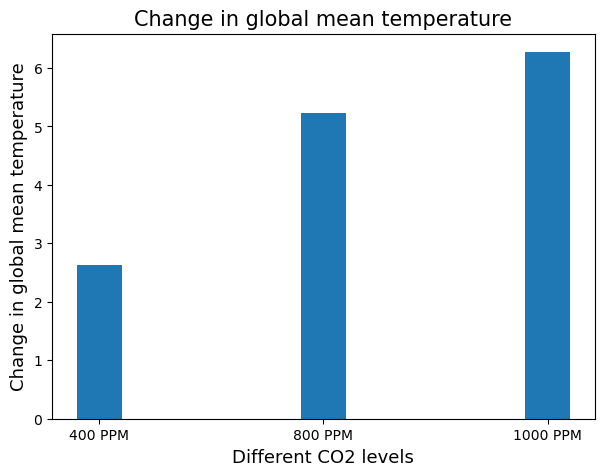

In [124]:
courses = ['400 PPM', '800 PPM', '1000 PPM']

change_15 = np.mean(temp_stats_15[15:,0,:]) -np.mean(temp_stats_15[1,0,:])
change_20 = np.mean(temp_stats_20[15:,0,:]) -np.mean(temp_stats_20[1,0,:])
change_25 = np.mean(temp_stats_25[15:,0,:]) -np.mean(temp_stats_25[1,0,:])

values = np.array([change_15, change_20, change_25])
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(courses, values,  
        width = 0.2)
 
plt.xlabel("Different CO2 levels", fontsize=13)
plt.ylabel("Change in global mean temperature", fontsize=13)
plt.title("Change in global mean temperature", fontsize=15)
plt.savefig('GlobalTempMean_bar.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

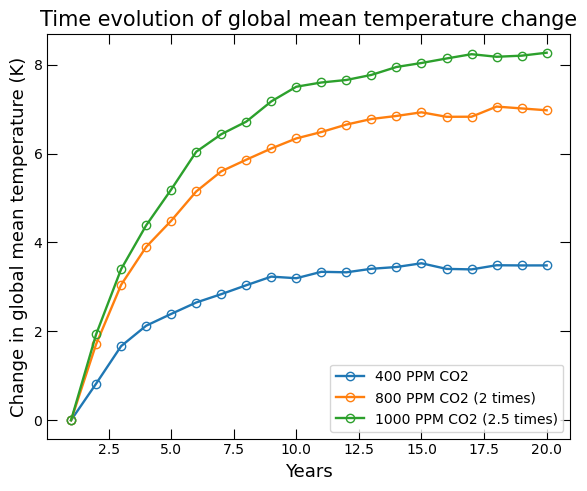

In [47]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global mean temperature change", size=15)

ax.set_ylabel('Change in global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(np.arange(1,21), np.mean(temp_stats_15[:,0,:],axis=1)-np.mean(temp_stats_15[:,0,:],axis=1)[0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='400 PPM CO2')
ax.plot(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1)-np.mean(temp_stats_20[:,0,:],axis=1)[0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='800 PPM CO2 (2 times)')
ax.plot(np.arange(1,21), np.mean(temp_stats_25[:,0,:],axis=1)-np.mean(temp_stats_25[:,0,:],axis=1)[0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='1000 PPM CO2 (2.5 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTempChange_log.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

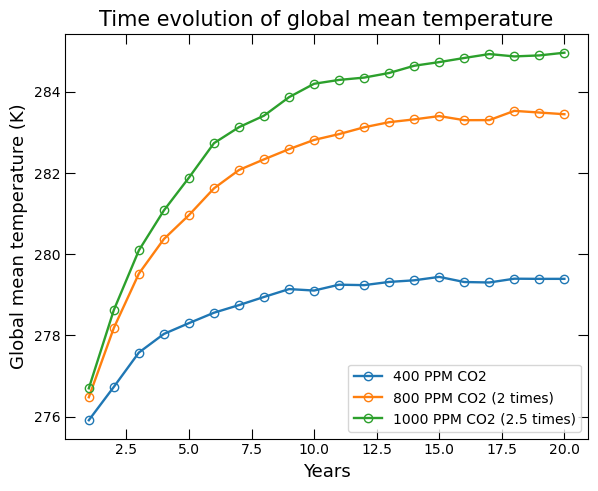

In [49]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global mean temperature", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(np.arange(1,21), np.mean(temp_stats_15[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='400 PPM CO2')
ax.plot(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='800 PPM CO2 (2 times)')
ax.plot(np.arange(1,21), np.mean(temp_stats_25[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='1000 PPM CO2 (2.5 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

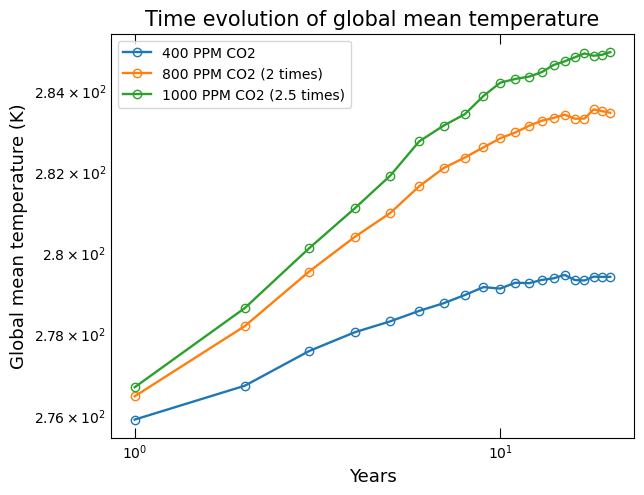

In [50]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global mean temperature", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.loglog(np.arange(1,21), np.mean(temp_stats_15[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='400 PPM CO2')
ax.loglog(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='800 PPM CO2 (2 times)')
ax.loglog(np.arange(1,21), np.mean(temp_stats_25[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='1000 PPM CO2 (2.5 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp_log.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

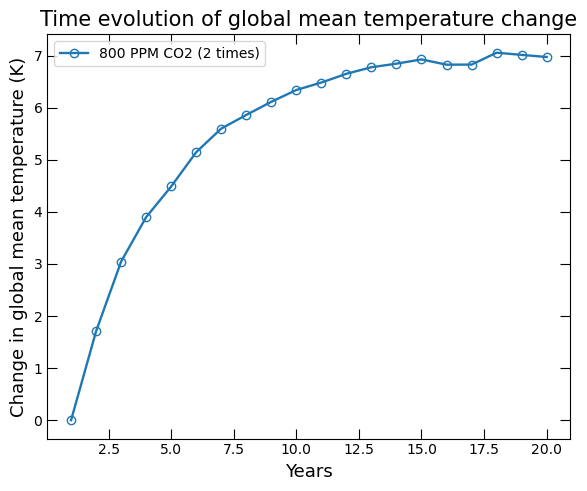

In [51]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global mean temperature change", size=15)

ax.set_ylabel('Change in global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1)-np.mean(temp_stats_20[:,0,:],axis=1)[0], '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='800 PPM CO2 (2 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTempChange_2time.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

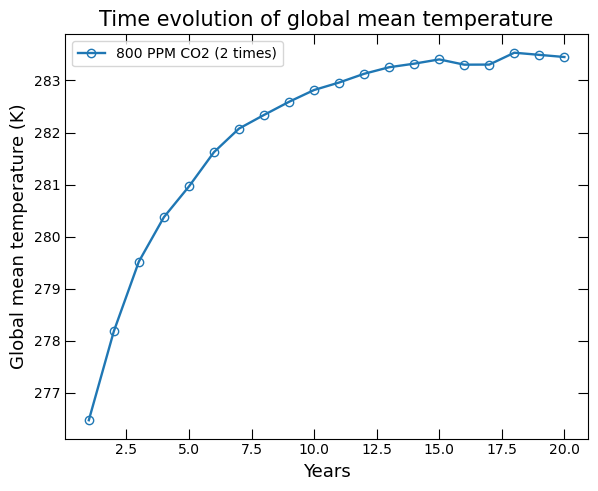

In [52]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global mean temperature", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.plot(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='800 PPM CO2 (2 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp_2time.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

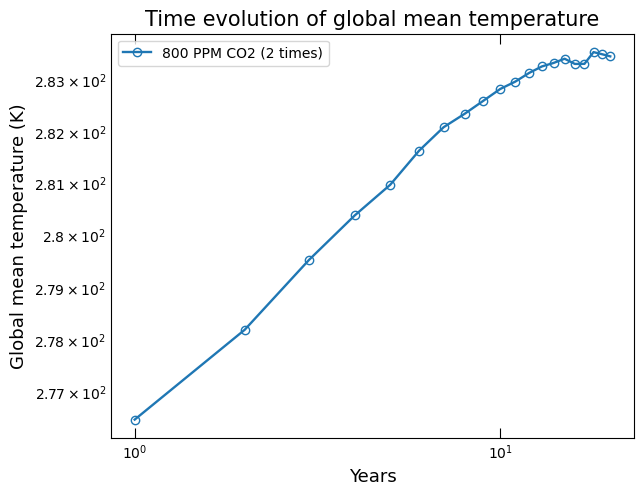

In [53]:
fig = plt.figure(figsize=(6.75, 5.25))
ax = fig.add_subplot(111)

ax.set_title("Time evolution of global mean temperature", size=15)

ax.set_ylabel('Global mean temperature (K)', fontsize=13)
ax.set_xlabel('Years', fontsize=13)


ax.tick_params(axis="x",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="y",direction="in", length=7,bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x",which='minor',direction="in", length=3,bottom=False, top=False, left=False, right=False)
ax.tick_params(axis="y",which='minor',direction="in", length=3,bottom=True, top=True, left=False, right=False)


ax.loglog(np.arange(1,21), np.mean(temp_stats_20[:,0,:],axis=1), '-o', linewidth=1.7, markersize=6, markerfacecolor='none', label='800 PPM CO2 (2 times)')

locs, labels = plt.yticks()

ax.legend()
plt.savefig('GlobalMeanTemp_log_2time.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [21]:
 temp_stats_15[1:,0]-temp_stats_15[0,0]

array([[-3.14746094e+00, -3.07998657e+00, -3.01364136e+00, ...,
         9.75646973e-01,  9.81811523e-01,  9.88586426e-01],
       [-2.15353394e+00, -2.08325195e+00, -2.01541138e+00, ...,
         1.78308105e+00,  1.78128052e+00,  1.77920532e+00],
       [-1.37017822e+00, -1.30596924e+00, -1.24301147e+00, ...,
         1.96691895e+00,  1.96615601e+00,  1.96517944e+00],
       ...,
       [-1.00646973e-01, -3.90930176e-02,  2.03552246e-02, ...,
         3.18533325e+00,  3.17999268e+00,  3.17459106e+00],
       [ 2.25830078e-02,  8.48693848e-02,  1.45751953e-01, ...,
         3.15975952e+00,  3.15640259e+00,  3.15386963e+00],
       [-2.78395386e+02, -2.78352203e+02, -2.78296600e+02, ...,
        -2.75273071e+02, -2.75283630e+02, -2.75259216e+02]])

### 4 Times CO2

In [81]:
temp_stats_20.shape

(25, 5)